<img src="logoUB.svg"  style="max-width:20%">

# Final project Machine Learning 2019-2020
#### Master in Innovation and Entrepreneurship in Biomedical Engineering
##### Authors: Arantxa Palma, Mónica Tuta

<center>
<h4>
    Heart disease binary classification from clinical data
    </h4> 
<img src="heartDesease.jpg"  style="max-width:30%">
</center>

## Contents

1. [Problem description](#pd)
1. [Upload data](#ud)
1. [Data description](#dd)
1. [Data exploration and preprocessing](#de)
    1. Identify the data types
    1. Identify and treat "NaN" values
    1. Visualization:
        1. Numeric:
            1. Correlation
            1. Distribution
            1. Histograms
            1. Scatterplot
        1. Categoric:
            1. Frequency
    1. Label encoding for categorical data
    1. Data normalization
    1. Feature Selection
    1. Dimensionality reduction
        1. PCA
        1. LDA
1. Modeling (For each one, theoretical background + model)
    1. KNN
    1. Bayesian methods
    1. Logistic regression
    1. Decission trees
    1. Random Forest
    1. SVM
1. Test and validation
1. Conclusions (Summary)

### Problem Description <a class="anchor" id="pd"></a>

According to the World Health Organization, cardiovascular diseases (CVDs) are the **number 1** cause of death globally, around **17.9 million** people die each year, **31%** of the deaths worldwide. More than **75%** of the cases occur in low and middle income countries and **85%** are due to heart attacks and strokes. CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions.<br>

Individuals at risk of CVD may demonstrate raised blood pressure, glucose, and lipids as well as overweight and obesity. Millions of people worldwide struggle to control the risk factors that lead to cardiovascular disease, many others remain unaware that they are at high risk. Many heart attacks and strokes can be prevented by controlling major risk factors through lifestyle interventions and drug treatment where necessary.<br>

The risk factors for CVD include behavioral factors, such as tobacco use, an unhealthy diet, harmful use of alcohol and inadequate physical activity, and physiological factors, including high blood pressure (hypertension), high blood cholesterol and high blood sugar or glucose which are linked to underlying social determinants and drivers, such as ageing, income and urbanization.<br>

*Identifying those at highest risk of CVDs and ensuring they receive appropriate treatment can prevent premature deaths. One way is to perform analyses (quantitative) to predict or classify whether the population are prone to CVDs according to significantly health features and act on them in advance*

### Upload Data <a class="anchor" id="ud"></a>

In [2]:
## Upload dataset
heart <- read.csv(file = 'heart.csv')
head(heart)

print('Dimension of the dataset')
dim(heart)

age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal
1 63  1   3  145      233  1   0       150     0     2.3     0     0  1   
2 37  1   2  130      250  0   1       187     0     3.5     0     0  2   
3 41  0   1  130      204  0   0       172     0     1.4     2     0  2   
4 56  1   1  120      236  0   1       178     0     0.8     2     0  2   
5 57  0   0  120      354  0   1       163     1     0.6     2     0  2   
6 57  1   0  140      192  0   1       148     0     0.4     1     0  1   
  target
1 1     
2 1     
3 1     
4 1     
5 1     
6 1

[1] "Dimension of the dataset"


[1] 303  14

### Data description <a class="anchor" id="dd"></a>

#### Contents

- age - age in years
- **sex** - (1 = male; 0 = female)
- **cp** - chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholestoral in mg/dl
- **fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg - resting electrocardiographic results
- thalach - maximum heart rate achieved
- **exang** - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest
- **slope** - the slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)
- ca - number of major vessels (0-3) colored by flourosopy
- **thal** - (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target** - have disease or not (1=yes, 0=no)

**Bold** features are categorical

***Creators***:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
1. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor: David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

#### Summary

In [0]:
summary(heart)

### Data Exploration <a class="anchor" id="de"></a>

#### Identify Data Type

In [0]:
## Data exploration
str(heart)

#### Identify and treat "NaN" values

In [0]:
#is.na(heart)
sum(is.na(heart))

There are not NaN values in the dataset

#### Visualization

In [11]:
options(warn=-1) #Hide warnings

#Load libraries
library(ggpubr)
library(tidyverse)
library(Hmisc)
library(corrplot)
library(purrr)
library(tidyr)
library(ggplot2)
library(dplyr)
library(gridExtra)


Attaching package: ‘gridExtra’



The following object is masked from ‘package:dplyr’:

    combine



##### Numeric

###### Correlation

In [4]:
# Dataframe with only numeric variables
heart_numeric <- heart[ , -which(names(heart) %in% c("sex","cp","fbs","exang","slope","thal"))]
dim(heart_numeric)

[1] 303   8

In [0]:
# Correlation matrix and plot
correlation <- cor(heart_numeric)
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
corrplot(correlation, method = "color", col = col(200),
         type = "upper", order = "hclust",
         addCoef.col = "black", # Add coefficient of correlation
         tl.col = "darkblue", tl.srt = 45, #Text label color and rotation
         )

###### Distribution - Histogram

In [0]:
heart_numeric %>%
  gather() %>%
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
    geom_histogram()

###### Scatterplot

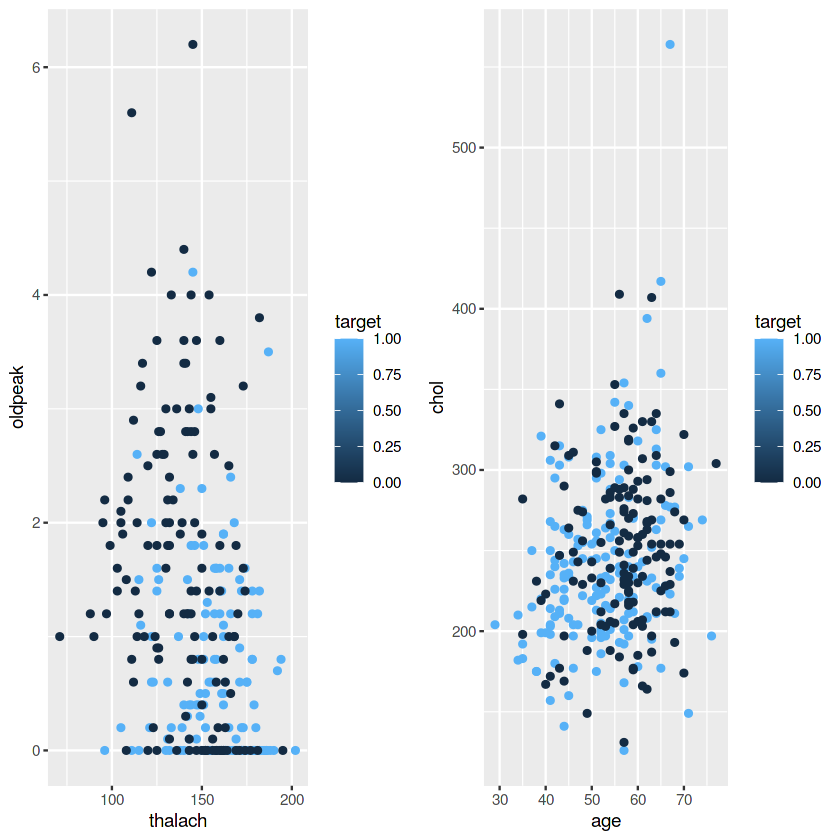

In [6]:
# Scatter plot comparing thalach-oldpeak and age-chol, with color representing target
p1 <- ggplot(heart_numeric,aes(x=thalach, y=oldpeak, color=target))+
geom_point()
p2 <- ggplot(heart_numeric,aes(x=age, y=chol, color=target))+
geom_point()
grid.arrange(p1, p2, nrow = 1)#subplot

In [0]:
ggarrange(p1, p2, nrow = 1)#subplot

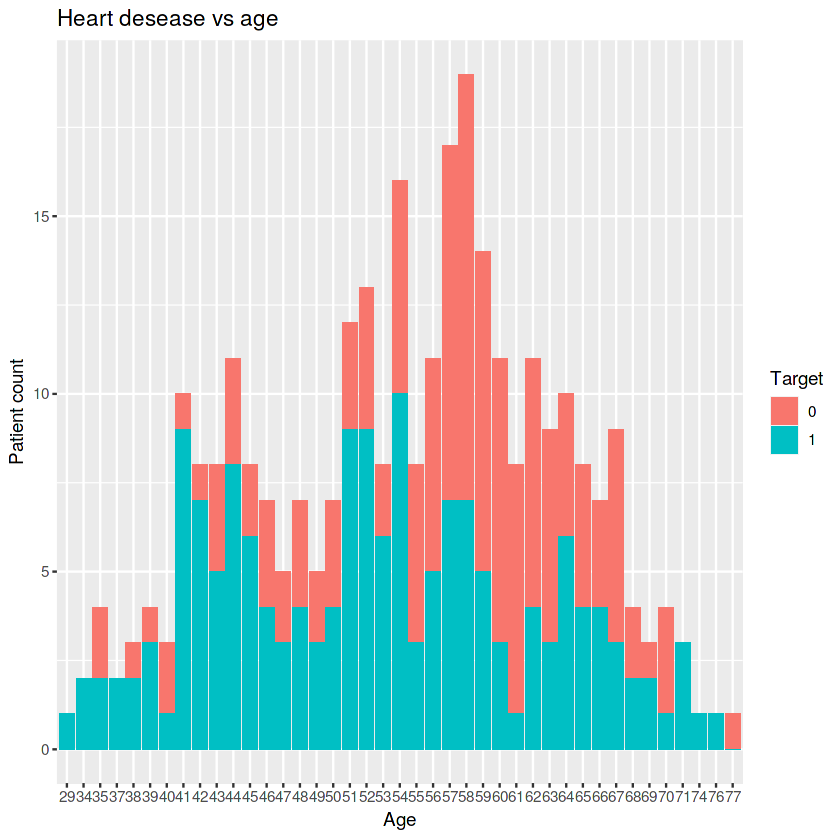

In [7]:
ggplot(as.data.frame(table(heart_numeric$age,heart_numeric$target)), aes(x = Var1, y = Freq, fill = Var2)) +
    geom_bar(stat="identity")+
   labs(y = "Patient count",
         x = "Age",
         fill = "Target",
         title = "Heart desease vs age")

In [8]:
age_bins <- c(20,30,40,50,60,70,80) #bins for age
age_cut <- cut(heart_numeric$age, age_bins) #Divide the interval with the bins

trestbps_bins <- c(80,100,120,140,160,180) #bins for trestbps
trestbps_cut <- cut(heart_numeric$trestbps, trestbps_bins) #Divide the interval with the bins

chol_bins <- c(100,150,200,250,300,350,400,450) #bins for trestbps
chol_cut <- cut(heart_numeric$chol, chol_bins) #Divide the interval with the bins

thalach_bins <- c(60,80,100,120,140,160,180,200,220) #bins for trestbps
thalach_cut <- cut(heart_numeric$thalach, thalach_bins) #Divide the interval with the bins

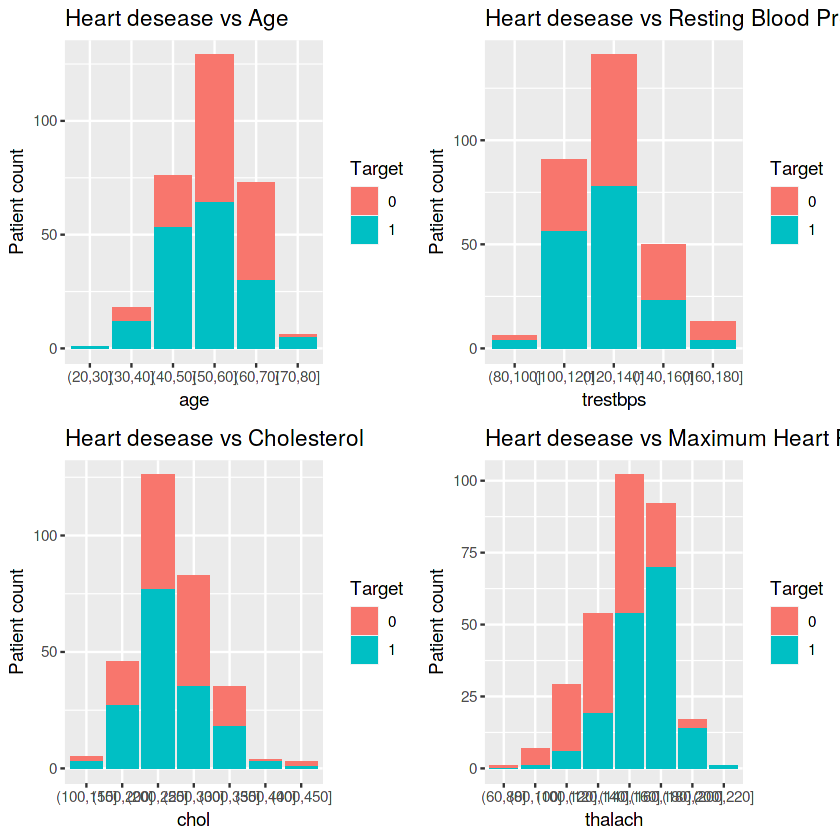

In [12]:
p_age <- ggplot(as.data.frame(table(age_cut,heart_numeric$target)), aes(x = age_cut, y = Freq, fill = Var2)) +
            geom_bar(stat="identity")+
               labs(y = "Patient count",
                     x = "age",
                     fill = "Target",
                     title = "Heart desease vs Age")
p_trestbps <- ggplot(as.data.frame(table(trestbps_cut,heart_numeric$target)), aes(x = trestbps_cut, y = Freq, fill = Var2)) +
            geom_bar(stat="identity")+
               labs(y = "Patient count",
                     x = "trestbps",
                     fill = "Target",
                     title = "Heart desease vs Resting Blood Pressure ")
p_chol <- ggplot(as.data.frame(table(chol_cut,heart_numeric$target)), aes(x = chol_cut, y = Freq, fill = Var2)) +
            geom_bar(stat="identity")+
               labs(y = "Patient count",
                     x = "chol",
                     fill = "Target",
                     title = "Heart desease vs Cholesterol")
p_thalach <- ggplot(as.data.frame(table(thalach_cut,heart_numeric$target)), aes(x = thalach_cut, y = Freq, fill = Var2)) +
            geom_bar(stat="identity")+
               labs(y = "Patient count",
                     x = "thalach",
                     fill = "Target",
                     title = "Heart desease vs Maximum Heart Rate")

#subplots
grid.arrange(p_age, p_trestbps, p_chol, p_thalach, nrow = 2)

##### Categoric

###### Frequency

In [0]:
library(dplyr)

In [0]:
barplot(table(heart$cp), xlab = "cp  (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)", ylab = "Count",
        main = "Chest pain type",col=c("blue","green","white","pink"))

In [0]:
#Correlation cp with other categorical variables
chisq.test(heart$cp, heart$sex)
chisq.test(heart$cp, heart$fbs)
chisq.test(heart$cp, heart$exang)
chisq.test(heart$cp, heart$slope)
chisq.test(heart$cp, heart$thal)
chisq.test(heart$cp, heart$target)

In [0]:
barplot(table(heart$fbs), xlab = "fbs (1 = true; 0 = false)", ylab = "Count",
        main = "Number cases fasting blood sugar > 120 mg/dl",col=c("white","orange"))

In [0]:
#Correlation fbs with other categorical variables
chisq.test(heart$fbs, heart$sex)
chisq.test(heart$fbs, heart$cp)
chisq.test(heart$fbs, heart$exang)
chisq.test(heart$fbs, heart$slope)
chisq.test(heart$fbs, heart$thal)
chisq.test(heart$fbs, heart$target)

In [0]:
barplot(table(heart$exang), xlab = "Exang (0 = no; 1 = yes)", ylab = "Count",
        main = "Exercise induced angina",col=c("white","gray"))

In [0]:
#Correlation exang with other categorical variables
chisq.test(heart$exang, heart$sex)
chisq.test(heart$exang, heart$fbs)
chisq.test(heart$exang, heart$cp)
chisq.test(heart$exang, heart$slope)
chisq.test(heart$exang, heart$thal)
chisq.test(heart$exang, heart$target)

In [0]:
barplot(table(heart$slope), xlab = " Slope(0 = upsloping, 1 = flat, 2 = downsloping)", ylab = "Count",
        main = "The slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)",col=c("#009999", "#0000FF"))

In [0]:
#Correlation slope with other categorical variables
chisq.test(heart$slope, heart$sex)
chisq.test(heart$slope, heart$fbs)
chisq.test(heart$slope, heart$exang)
chisq.test(heart$slope, heart$cp)
chisq.test(heart$slope, heart$thal)
chisq.test(heart$slope, heart$target)

In [0]:
library("RColorBrewer")
barplot(table(heart$thal), xlab = " Thal (3 = normal; 6 = fixed defect; 7 = reversable defect)", ylab = "Count",
        main = "Thal",col=c("white","green","orange"))

In [0]:
#Correlation cp with other categorical variables
chisq.test(heart$thal, heart$sex)
chisq.test(heart$thal, heart$fbs)
chisq.test(heart$thal, heart$exang)
chisq.test(heart$thal, heart$slope)
chisq.test(heart$thal, heart$cp)
chisq.test(heart$thal, heart$target)

##### Target

###### Frequency

In [0]:
heart%>% count(target)
(tableTargetSex <- heart%>% count(target,sex))
str(tableTargetSex)
(TargetSex<-as.data.frame(tableTargetSex))

In [0]:
barplot(table(heart$target), xlab = "Target (0=No disease, 1=Disease)", ylab = "Count",
        main = "Number cases heart disease",col=c("white","red"))

In [0]:
Nodisease <- sum(heart$target == 0)
Disease <- sum(heart$target == 1)
Totaltarget <- length(heart$target)
PercNodisease <- round(Nodisease*100/Totaltarget)
Percdisease <- round(Disease*100/Totaltarget)
paste("Percentage of patients that do not have heart disease: ",PercNodisease,"%")
paste("Percentage of patients that have heart disease: ",Percdisease,"%")

In [0]:
library(plotrix)
Target <- c(Nodisease,Disease)
lbls <- c("No disease", "Disease")
pie(Target,labels=lbls,explode=0.1,
   main="Pie Chart of Disease ")

In [0]:
barplot(table(heart$sex), xlab = "Sex (0=Female, 1=Male)", ylab = "Count",
        main = "Number Women and Man",col=c("pink","blue"))

In [0]:
#Number of no disease cases by Sex
Nodiseasefemale <- sum(heart$target == 0 & heart$sex==0)
Nodiseasemale <- sum(heart$target == 0 & heart$sex==1)
paste("Number of Female patients with no heart disease: ",Nodiseasefemale)
paste("Number of Male patients with no heart disease: ",Nodiseasemale)
#Number of disease cases by Sex
Diseasefemale <- sum(heart$target == 1 & heart$sex==0)
Diseasemale <- sum(heart$target == 1 & heart$sex==1)
paste("Number of Female patients heart disease: ",Diseasefemale)
paste("Number of Male patients with heart disease: ",Diseasemale)

In [0]:
library(ggplot2)

In [0]:
Sex <- factor(heart$sex)
ggplot(data=heart)+geom_bar(aes(x=factor(target),fill=Sex))+ xlab("Target (0=No disease, 1=Disease)") + 
  ylab("Count")+ggtitle(label="Distribution No disease and disease by Gender")+  theme_bw()

In [0]:
library(ggplot2)
Gender <- factor(TargetSex$sex)
plotsextarget <- ggplot(TargetSex, aes(x=Gender, y=n, fill=factor(target)))+
  geom_bar(position="dodge", stat="identity")+
  xlab("Sex (0=Female, 1=Male)") + 
  ylab("Count")                 +
  ggtitle("Female and Male No Heart Disease vs Heart Disease ")  +
  theme_bw()

In [0]:
(TargetSex)

Positivecasesfemale <- TargetSex[ c(3), c(3)]
Positivecasesmale <- TargetSex[ c(4), c(3)]
Negativecasesfemale <- TargetSex[ c(1), c(3)]
Negativecasesmale <- TargetSex[ c(2), c(3)]
(CountPosNegSex <- matrix(c(Positivecasesfemale,Positivecasesmale, Negativecasesfemale,Negativecasesmale), nrow = 2, dimnames = list(Grupo = c("Female", "Male"), Target= c("Yes", "No"))))
prop.table(CountPosNegSex,margin=1)
prop.test(CountPosNegSex)


In [0]:
library(ggplot2)
tableTargetcp <- heart%>% count(target,cp)
str(tableTargetcp)
(Targetcp<-as.data.frame(tableTargetcp))
ChestPain <- factor(Targetcp$cp)
plotcptarget <-ggplot(Targetcp, aes(x=factor(cp), y=n, fill=factor(target)))+
  geom_bar(position="dodge", stat="identity")+
  xlab(" chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)") + 
  ylab("Count")                 +
  ggtitle("Cp vs Heart Disease ")  +
  theme_bw()

In [0]:
tableTargetfbs <- heart%>% count(target,fbs)
str(tableTargetfbs)
(Targetfbs<-as.data.frame(tableTargetfbs))
Fastingbloodsugar<- factor(Targetfbs$fbs)
plotfbstarget<-ggplot(Targetfbs, aes(x=Fastingbloodsugar, y=n, fill=factor(target)))+
  geom_bar(position="dodge", stat="identity")+
  xlab("Fbs (0=False, 1=True)") + 
  ylab("Count")                 +
  ggtitle("Fasting blood sugar > 120 mg/dl vs Heart Disease ")  +
  theme_bw()

In [0]:
tableTargetexang <- heart%>% count(target,exang)
str(tableTargetfbs)
(Targetexang<-as.data.frame(tableTargetexang))
Exang<- factor(Targetexang$exang)
plottargetexang <- ggplot(Targetexang, aes(x=Exang, y=n, fill=factor(target)))+
  geom_bar(position="dodge", stat="identity")+
  xlab("Exercise induced angina (1 = yes; 0 = no)") + 
  ylab("Count")                 +
  ggtitle("Exercise induced angina vs Heart Disease ")  +
  theme_bw()


In [0]:
tableTargetslope <- heart%>% count(target,slope)
str(tableTargetslope)
(Targetslope<-as.data.frame(tableTargetslope))
Slope<- factor(Targetslope$slope)
plottargetslope <- ggplot(Targetslope, aes(x=Slope, y=n, fill=factor(target)))+
  geom_bar(position="dodge", stat="identity")+
  xlab("The slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)") + 
  ylab("Count")                 +
  ggtitle("Slope vs Heart Disease ")  +
  theme_bw()

In [0]:
tableTargetthal <- heart%>% count(target,thal)
str(tableTargetthal)
(Targetthal<-as.data.frame(tableTargetthal))
Thal<- factor(Targetthal$thal)
plottargetthal <- ggplot(Targetthal, aes(x=Thal, y=n, fill=factor(target)))+
  geom_bar(position="dodge", stat="identity")+
  xlab(" Thal (3 = normal; 6 = fixed defect; 7 = reversable defect)") + 
  ylab("Count")                 +
  ggtitle("Thal vs Heart Disease ")  +
  theme_bw()

In [0]:
figure <- ggarrange(plotsextarget, plotcptarget, plotfbstarget, plottargetexang, plottargetslope,plottargetthal,
                    ncol = 1, nrow = 3)
figure

In [0]:
#asociación variables categoricas
#heart <- read.csv("~/MASTER ESP/MIEBE SECOND SEMESTER/MACHINE LEARNING/FINAL PROJECT/heart.csv")
#head(heart)
#library("GoodmanKruskal")
#varSet1 <- c("sex", "cp", "exang","fbs","slope","thal","target")
#CarFrame1 <- subset(heart, select = varSet1)
#GKmatrix1 <- GKtauDataframe(CarFrame1)
#plot(GKmatrix1)
#heart$thal


Conclusions

Not needed another treament for the features


### Label encoding for categorical data

In [8]:
library("dummies")
result1 <- cbind(heart,dummy(heart$cp,sep="cp"))
result2 <- cbind(result1,dummy(result1$slope,sep="slope"))
heartlabel <- cbind(result2,dummy(result2$thal,sep="thal"))
head(heartlabel)


Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”

age sex cp trestbps chol fbs restecg thalach exang oldpeak ⋯ NAcp1 NAcp2
1 63  1   3  145      233  1   0       150     0     2.3     ⋯ 0     0    
2 37  1   2  130      250  0   1       187     0     3.5     ⋯ 0     1    
3 41  0   1  130      204  0   0       172     0     1.4     ⋯ 1     0    
4 56  1   1  120      236  0   1       178     0     0.8     ⋯ 1     0    
5 57  0   0  120      354  0   1       163     1     0.6     ⋯ 0     0    
6 57  1   0  140      192  0   1       148     0     0.4     ⋯ 0     0    
  NAcp3 NAslope0 NAslope1 NAslope2 NAthal0 NAthal1 NAthal2 NAthal3
1 1     1        0        0        0       1       0       0      
2 0     1        0        0        0       0       1       0      
3 0     0        0        1        0       0       1       0      
4 0     0        0        1        0       0       1       0      
5 0     0        0        1        0       0       1       0      
6 0     0        1        0        0       1       0       0

#### Data normalization